# Bounding box

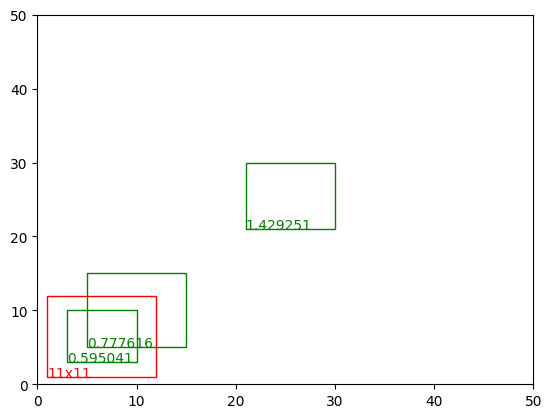

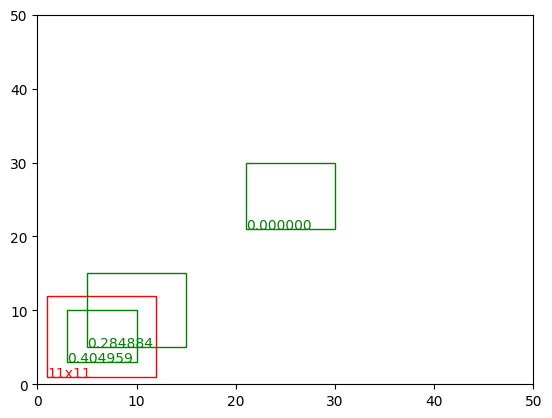

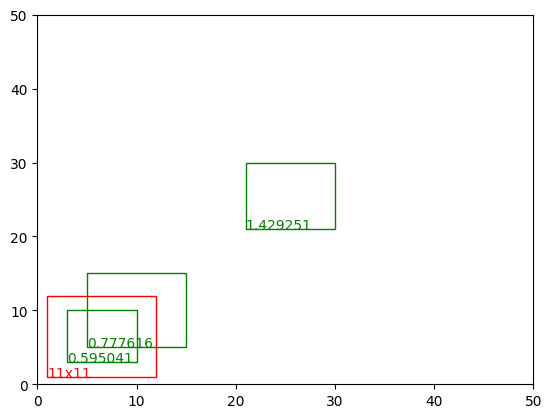

In [1]:
import unitrack.costs
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import torch


boxes1 = torch.tensor(
    [
        [1, 1, 12, 12],
    ]
)
boxes2 = torch.tensor(
    [
        [3, 3, 10, 10],
        [5, 5, 15, 15],
        [21, 21, 30, 30],
    ]
)


# iou = 1.0 - box_iou(boxes1, boxes2)
iou1, iou2 = unitrack.costs._box_diou_iou(boxes1, boxes2, eps=1e-6)
iou1 = 1 - iou1

iou3 = 1 - unitrack.costs._complete_box_iou(boxes1, boxes2, eps=1e-6)

for iou in (iou1, iou2, iou3):
    fig, ax = plt.subplots()
    ax.set_xbound(0, 50)
    ax.set_ybound(0, 50)
    for x1, y1, x2, y2 in boxes1:
        w = int(x2 - x1)
        h = int(y2 - y1)
        ax.add_patch(pat.Rectangle((x1, y1), w, h, fill=False, edgecolor="r"))
        ax.text(x1, y1, f"{w}x{h}", color="r")

    for i, (x1, y1, x2, y2) in enumerate(boxes2):
        w = int(x2 - x1)
        h = int(y2 - y1)
        ax.add_patch(pat.Rectangle((x1, y1), w, h, fill=False, edgecolor="g"))
        ax.text(x1, y1, f"{iou[0,i]:2f}", color="g")


# Embedding vectors

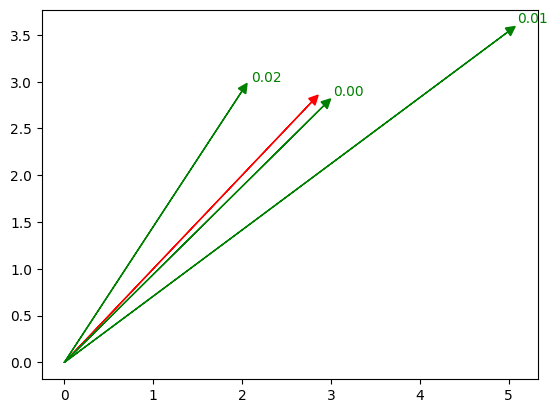

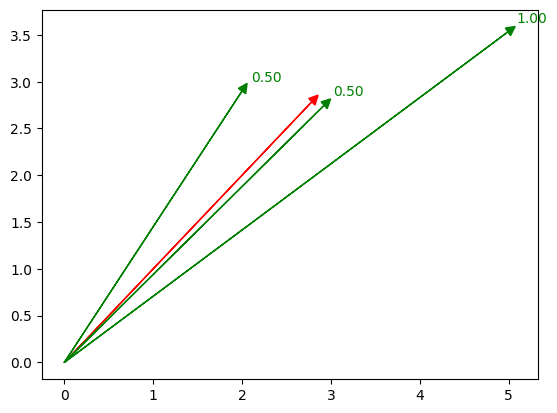

In [4]:
import unitrack.costs
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import torch

vecs1 = torch.tensor([
    [torch.pi/4, torch.pi/4],
]) + 2.0

vecs2 = torch.tensor([
    [torch.pi/3.4, torch.pi/4.2],
    [torch.pi/2.1 * 2, torch.pi/4.1 * 2],
    [0, 0.9],
]) + 2.0

csim = unitrack.costs._cosine_distance(vecs1, vecs2, 1e-8)
scim = unitrack.costs._softmax_distance(vecs1, vecs2)


for sim in (csim, scim):
    fix, ax = plt.subplots()
    # Draw vectors in vecs1
    for vx, vy in vecs1:
        ax.arrow(0, 0, vx, vy, head_width=0.1, head_length=0.1, fc="r", ec="r")

    # Draw vectors in vecs2
    for i, (vx, vy) in enumerate(vecs2):
        ax.arrow(0, 0, vx, vy, head_width=0.1, head_length=0.1, fc="g", ec="g")
        ax.text(vx+0.1, vy+0.1, f"{sim[0,i]:.2f}", color="g")
